In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

## Data

In [2]:
data_df = pd.read_table('../raw_data/train_v2.csv', sep=',', )
data_df['tags'] = data_df['tags'].apply(lambda x: x.split()).tolist()
data_df.head()

,image_name,tags
0,train_0,"[haze, primary]"
1,train_1,"[agriculture, clear, primary, water]"
2,train_2,"[clear, primary]"
3,train_3,"[clear, primary]"
4,train_4,"[agriculture, clear, habitation, primary, road]"


In [3]:
len(data_df)

40479

In [5]:
def get_label_distribution(df: pd.DataFrame, col_name: str):
    tags_by_img = df[col_name]
    tags_all = [x for xs in tags_by_img for x in xs]
    unique_tags = set(tags_all)

    tags_values = {}
    for tag in unique_tags:
        tags_values[tag] = tags_all.count(tag)

    return tags_values

## Data 2

In [12]:
from PIL import Image

In [13]:
def load_sample(file):
    image = Image.open(file)
    image = image.convert("RGB")
    image.load()
    return image

In [14]:
root = Path('../raw_data/train-jpg/')
files = sorted(list(root.rglob('*')))

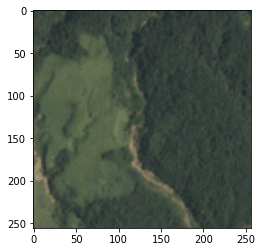

In [16]:
img = load_sample(files[1])
img = np.asarray(img)
plt.imshow(img)

In [17]:
mlb = MultiLabelBinarizer()
mlb.fit(data_df['tags'])

mlb.transform([['primary', 'haze']])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [18]:
train_df, val_df = train_test_split(data_df, test_size=0.1)

In [19]:
val_dist = get_label_distribution(val_df, 'tags')
val_dist

{'blow_down': 14,
 'primary': 3785,
 'slash_burn': 19,
 'agriculture': 1266,
 'haze': 257,
 'cloudy': 183,
 'bare_ground': 79,
 'water': 759,
 'selective_logging': 30,
 'road': 790,
 'cultivation': 437,
 'artisinal_mine': 27,
 'conventional_mine': 8,
 'blooming': 32,
 'clear': 2865,
 'habitation': 375,
 'partly_cloudy': 743}

In [20]:
train_dist = get_label_distribution(train_df, 'tags')
train_dist

{'blow_down': 87,
 'primary': 33728,
 'slash_burn': 190,
 'agriculture': 11049,
 'haze': 2440,
 'cloudy': 1906,
 'bare_ground': 783,
 'water': 6652,
 'conventional_mine': 92,
 'road': 7281,
 'cultivation': 4110,
 'artisinal_mine': 312,
 'selective_logging': 310,
 'blooming': 300,
 'clear': 25566,
 'habitation': 3285,
 'partly_cloudy': 6518}

In [21]:
val_values = list(map(lambda x: x / sum(val_dist.values()), val_dist.values()))
train_values = list(map(lambda x: x / sum(train_dist.values()), train_dist.values()))

<BarContainer object of 17 artists>

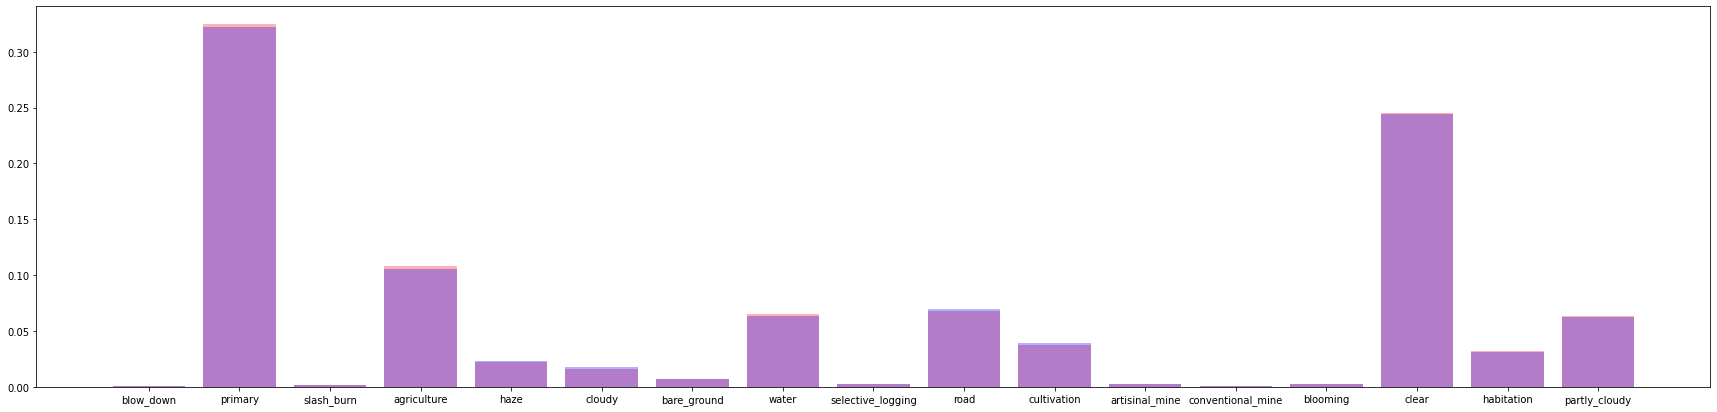

In [22]:
plt.figure(figsize=(30, 7))
plt.bar(val_dist.keys(), val_values, color='red', alpha=0.3)
plt.bar(train_dist.keys(), train_values, color='blue', alpha=0.3)